In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')

import warnings
warnings.filterwarnings("ignore")

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/utkarshgoyal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/utkarshgoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/utkarshgoyal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/utkarshgoyal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# EDA

In [5]:
df = pd.read_csv('./data/news_train.csv')
df.head()

ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business

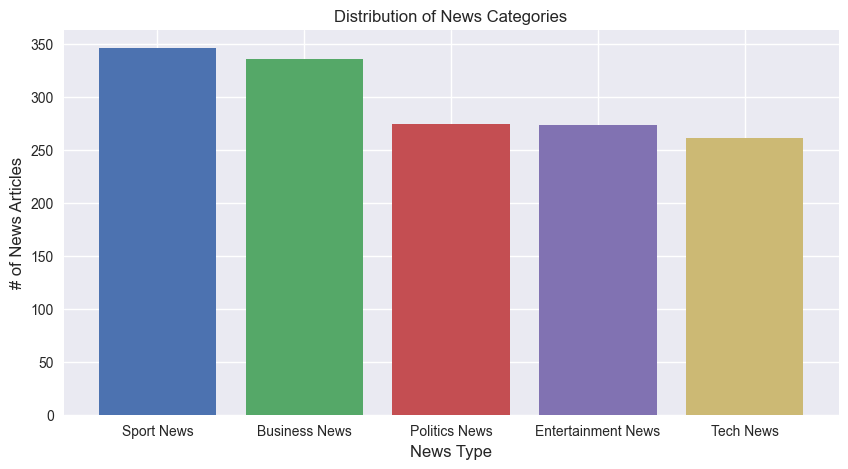

In [6]:
df_count = df.Category.value_counts().reset_index()
plt.figure(figsize=(10, 5))
plt.bar('Sport News', len(df[df['Category']=='sport']))
plt.bar('Business News', len(df[df['Category']=='business']))
plt.bar('Politics News', len(df[df['Category']=='politics']))
plt.bar('Entertainment News', len(df[df['Category']=='entertainment']))
plt.bar('Tech News', len(df[df['Category']=='tech']))
plt.title('Distribution of News Categories', size=12)
plt.xlabel('News Type', size=12)
plt.ylabel('# of News Articles', size=12);

In [7]:
df['id'] = df['Category'].factorize()[0]
df.drop(['ArticleId'], axis=1, inplace=True)
df.head()

Text  Category  id
0  worldcom ex-boss launches defence lawyers defe...  business   0
1  german business confidence slides german busin...  business   0
2  bbc poll indicates economic gloom citizens in ...  business   0
3  lifestyle  governs mobile choice  faster  bett...      tech   1
4  enron bosses in $168m payout eighteen former e...  business   0

business related words:


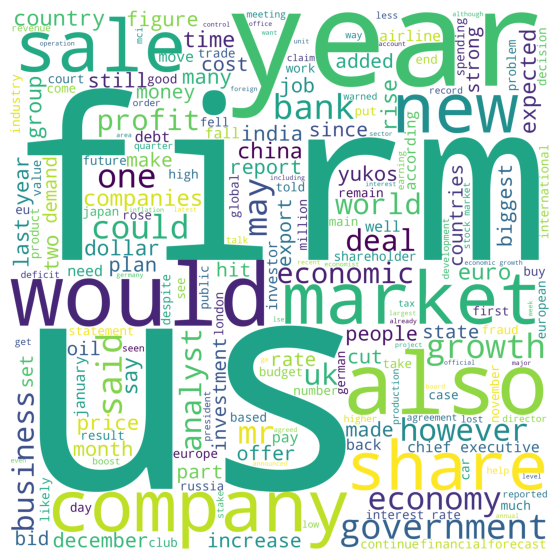

tech related words:


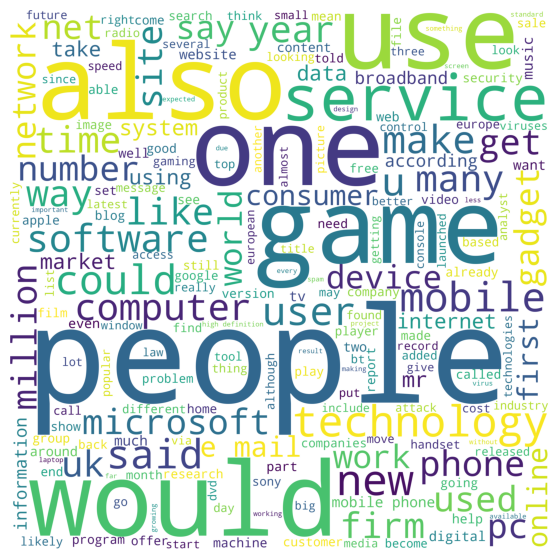

politics related words:


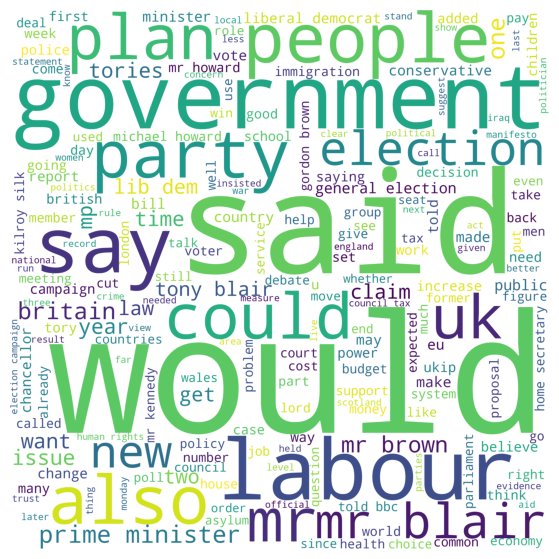

sport related words:


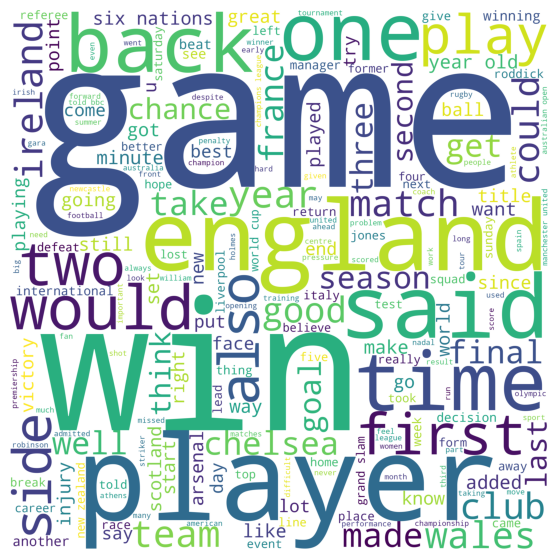

entertainment related words:


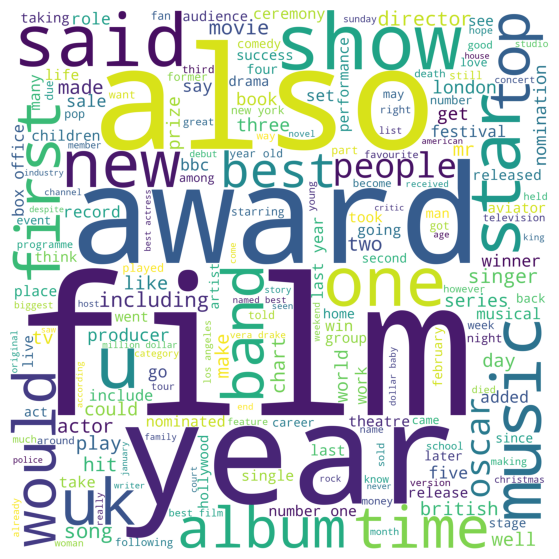

In [8]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

business = df[df['id'] == 0]
business = business['Text']

tech = df[df['id'] == 1]
tech = tech['Text']

politics = df[df['id'] == 2]
politics = politics['Text']

sport = df[df['id'] == 3]
sport = sport['Text']

entertainment = df[df['id'] == 4]
entertainment = entertainment['Text']


def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text' and word != 'said')])
    wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

# Data Cleaning

In [8]:
def preprocessor(i):
    
    i = re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)","",i)
    i = i.lower()
    
    # get rid of urls
    i = re.sub('https?://\S+|www\.\S+', '', i)
    i = re.sub('<[^>]*>', '', i)
    i = re.sub(r'[^\w\s]','', i)
    i = re.sub(r'\$\w*','', i)
    i = re.sub(r'^RT[\s]+','', i)
    i = re.sub(r'http\S+','', i)
    i = re.sub(r'#','', i)

    # get rid of non words and extra spaces
    i = re.sub('\\W', ' ', i)
    i = re.sub('\n', '', i)
    i = re.sub(' +', ' ', i)
    i = re.sub('^ ', '', i)
    i = re.sub(' $', '', i)
    return i

df['Text'] = df['Text'].apply(preprocessor)

In [9]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [x for x in words if x not in stop_words]

df['Text'] = df['Text'].apply(remove_stopwords)

In [10]:
def lemmatize_word(text):
    wordnet = WordNetLemmatizer()
    return " ".join([wordnet.lemmatize(word) for word in text])

df['Text'] = df['Text'].apply(lemmatize_word)

business related words:


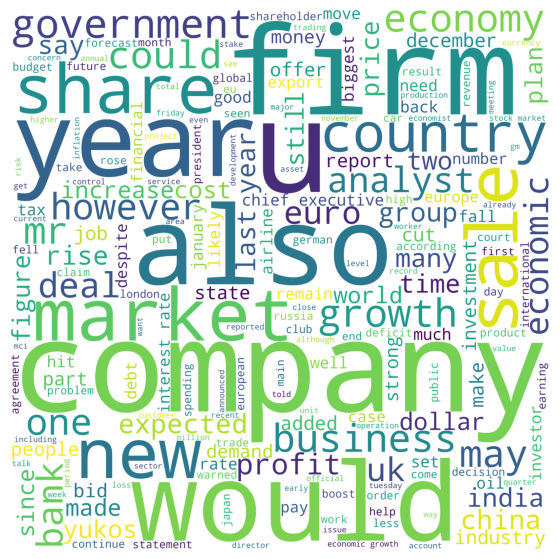

tech related words:


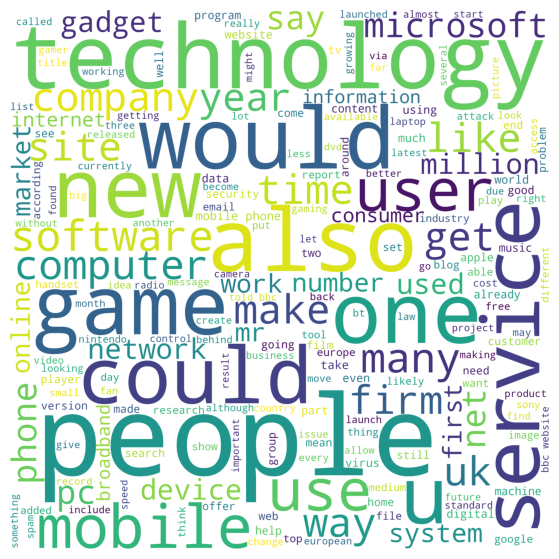

politics related words:


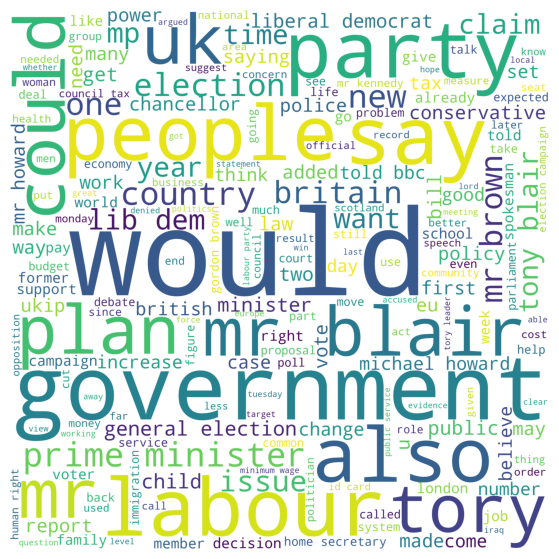

sport related words:


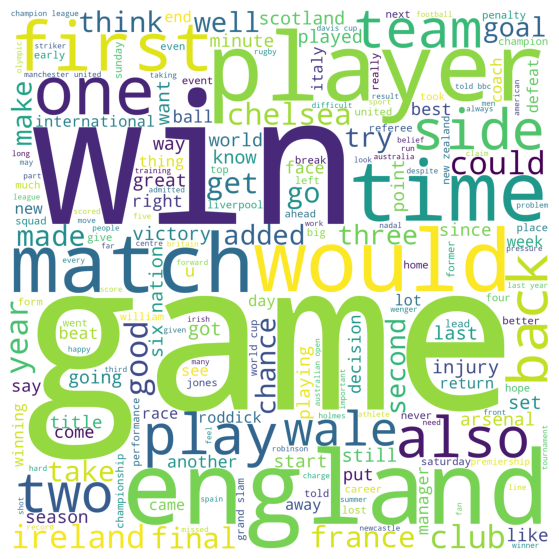

entertainment related words:


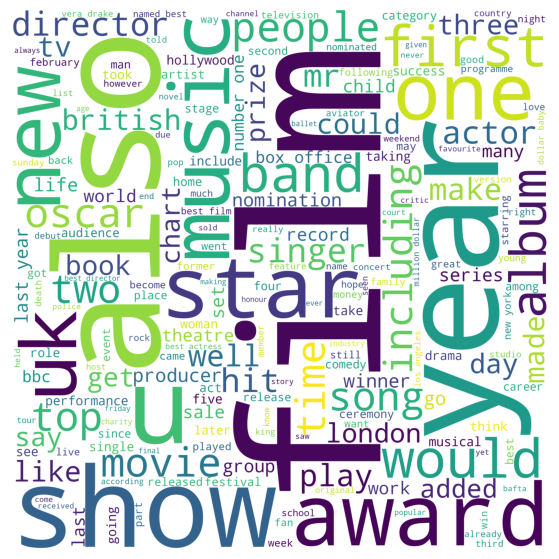

In [11]:
from wordcloud import WordCloud
stop = set(stopwords.words('english'))

business = df[df['id'] == 0]
business = business['Text']

tech = df[df['id'] == 1]
tech = tech['Text']

politics = df[df['id'] == 2]
politics = politics['Text']

sport = df[df['id'] == 3]
sport = sport['Text']

entertainment = df[df['id'] == 4]
entertainment = entertainment['Text']


def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'news' and word != 'text' and word != 'said')])
    wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')

## Build a classification model using various methods

In [13]:
porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [14]:
tfidf = TfidfVectorizer(strip_accents='unicode',
                        lowercase=True,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

X = tfidf.fit_transform(df['Text'])
y = df['id'].values

In [15]:
model_params = {

    'logistic_regression' : {
        'model': LogisticRegression(multi_class='auto'),
        'params': {
        'penalty': ['l1', 'l2', None],  # Different regularization techniques
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller = stronger regularization)
        'solver': ['lbfgs', 'liblinear', 'saga', 'newton-cg'],  # Optimization algorithms
        'tol': [1e-4, 1e-3, 1e-2],  # Tolerance for stopping criteria
        'class_weight': ['balanced', None],  # Adjusts class weights for imbalanced data
        'intercept_scaling': [1, 10, 100],  # Adjusts the intercept magnitude (for certain solvers)
        }
    },

    'kneighbours': {
        'model': KNeighborsClassifier(n_jobs=-1),
        "params": {
            
            'n_neighbors' : [10, 50, 100],
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params' : {
            'n_estimators': [1,5,10,100],
            'max_depth': [2,3,4,5],
            'min_samples_leaf': [100,200,300,500,1000],
            'criterion' : ['gini','entropy'], 
        }
    },
 'xgboost': {
    'model': XGBClassifier(n_jobs=-1, verbosity=0),  # Runs on CPU
    'params': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'tree_method': ['hist'],  # CPU-based histogram algorithm
    }
},

'lightgbm': {
    'model': LGBMClassifier(n_jobs=-1, verbose=-1, device='cpu'),  # Runs on CPU
    'params': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'boosting_type': ['gbdt'],
    }
},
}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3)
scores = []

for model_name, mp in model_params.items():
    print(model_name)
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_.round(4),
        'best_params': clf.best_params_
    })

logistic_regression
kneighbours
random_forest
xgboost
lightgbm


In [17]:
rel = pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values('best_score', ascending=False)
rel

model  best_score  \
0  logistic_regression      0.9772   
4             lightgbm      0.9584   
3              xgboost      0.9470   
1          kneighbours      0.9436   
2        random_forest      0.4094   

                                         best_params  
0  {'C': 1, 'class_weight': None, 'intercept_scal...  
4  {'boosting_type': 'gbdt', 'learning_rate': 0.1...  
3  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
1                                {'n_neighbors': 50}  
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...

The results from the table tells us that we should use logistic regression with the following best parameters.

## Using the best model as baseline

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

In [19]:
model = LogisticRegression(**{'C': 0.001,'class_weight': 'balanced','intercept_scaling': 1,'penalty': None,'solver': 'saga', 'tol': 0.01})
model.fit(X_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', penalty=None,
                   solver='saga', tol=0.01)

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = model.predict(X_test)
print("---Test Set Results---")
print("Accuracy with logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

---Test Set Results---
Accuracy with logreg: 0.9695121951219512
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       111
           1       0.97      0.97      0.97        86
           2       0.98      0.95      0.96        91
           3       0.99      0.99      0.99       114
           4       0.96      0.98      0.97        90

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



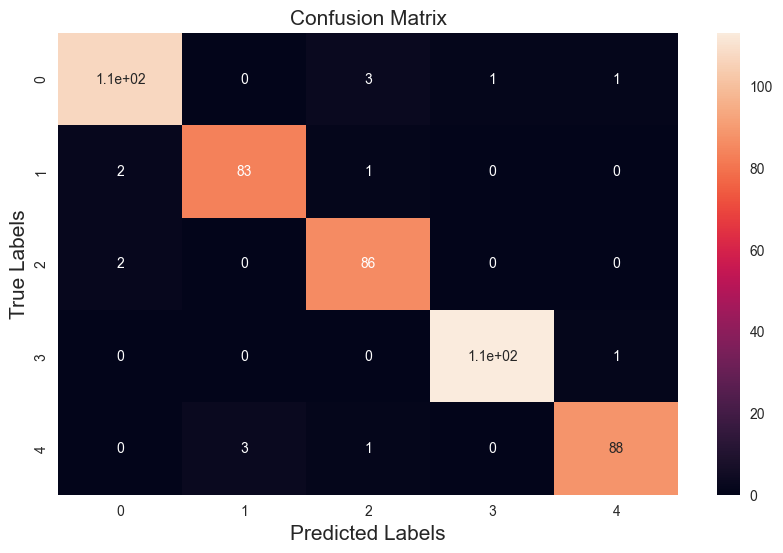

In [21]:
import seaborn as sns

matrix = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);
plt.show()

# Keras

In [12]:
import tensorflow as tf

In [13]:
X = df['Text']
y = df['id']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [15]:
import re

def normalize(data):
    normalized = []
    for i in data:
        i = i.lower()
        # get rid of urls
        i = re.sub('https?://\S+|www\.\S+', '', i)
        # get rid of non words and extra spaces
        i = re.sub('\\W', ' ', i)
        i = re.sub('\n', '', i)
        i = re.sub(' +', ' ', i)
        i = re.sub('^ ', '', i)
        i = re.sub(' $', '', i)
        normalized.append(i)
    return normalized

X_train = normalize(X_train)
X_test = normalize(X_test)

In [16]:
vocab_size = 5000
embedding_dim = 64
max_length = 256
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(X_train)

In [18]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [19]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding=padding_type, truncating=trunc_type, maxlen=max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, padding=padding_type, truncating=trunc_type, maxlen=max_length)

In [20]:
input_dim = X_train.shape[1]

## Dense

### Simple

In [21]:
model = tf.keras.models.Sequential([

tf.keras.layers.Dense(128, input_dim=input_dim, activation='relu'),
tf.keras.layers.Dropout(0.25, name="dropout"),
tf.keras.layers.Dense(embedding_dim, activation='relu'),
tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

2025-02-02 12:32:30.900547: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-02-02 12:32:30.900579: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-02-02 12:32:30.900584: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-02-02 12:32:30.900601: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-02 12:32:30.900609: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,477 (162.02 KB)

 Trainable params: 41,477 (162.02 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
# METRICS = [
#       tf.keras.metrics.BinaryAccuracy(name='accuracy'),
#       tf.keras.metrics.Precision(name='precision'),
#       tf.keras.metrics.Recall(name='recall')
# ]
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/30


2025-02-02 12:32:31.319016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.2135 - loss: 2318.4812 - val_accuracy: 0.2857 - val_loss: 1563.2051
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2879 - loss: 1670.2255 - val_accuracy: 0.3214 - val_loss: 1263.6340
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2760 - loss: 1509.7325 - val_accuracy: 0.2768 - val_loss: 1179.5730
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2968 - loss: 1326.6873 - val_accuracy: 0.2321 - val_loss: 1169.2595
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2699 - loss: 1141.6907 - val_accuracy: 0.3304 - val_loss: 936.2781
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3328 - loss: 1024.2820 - val_accuracy: 0.2768 - val_loss: 974.3677
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2986 - loss: 980.1746 - val_accuracy: 0.3125 - val_loss: 722.4214
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3426 - loss: 752.8230 - va

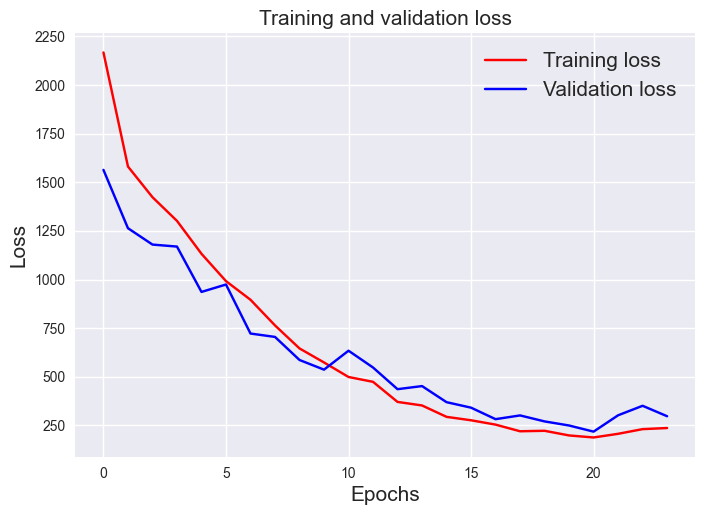

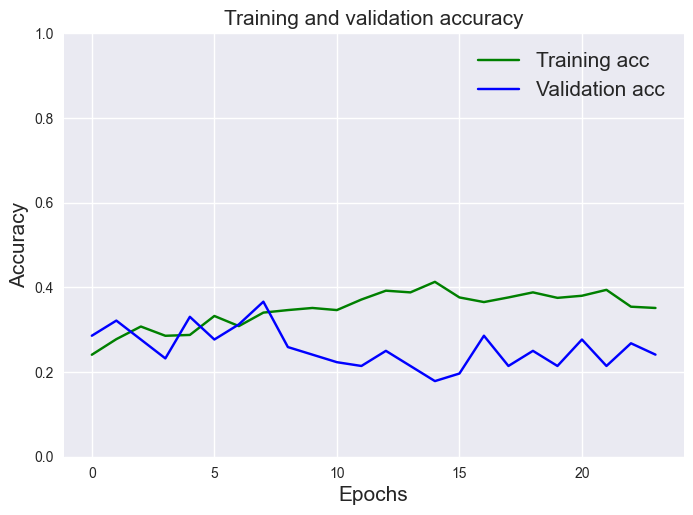

In [24]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0,1))
plt.show()

In [25]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)  # Convert softmax outputs to class labels

print("---Test Set Results---")
print("Accuracy: {}".format(accuracy_score(y_test, pred_classes)))
print(classification_report(y_test, pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
---Test Set Results---
Accuracy: 0.2707774798927614
              precision    recall  f1-score   support

           0       0.20      0.18      0.19        84
           1       0.28      0.37      0.32        65
           2       0.25      0.22      0.23        69
           3       0.32      0.51      0.39        87
           4       0.21      0.04      0.07        68

    accuracy                           0.27       373
   macro avg       0.25      0.26      0.24       373
weighted avg       0.25      0.27      0.25       373



Text(0.5, 1.0, 'Confusion Matrix')

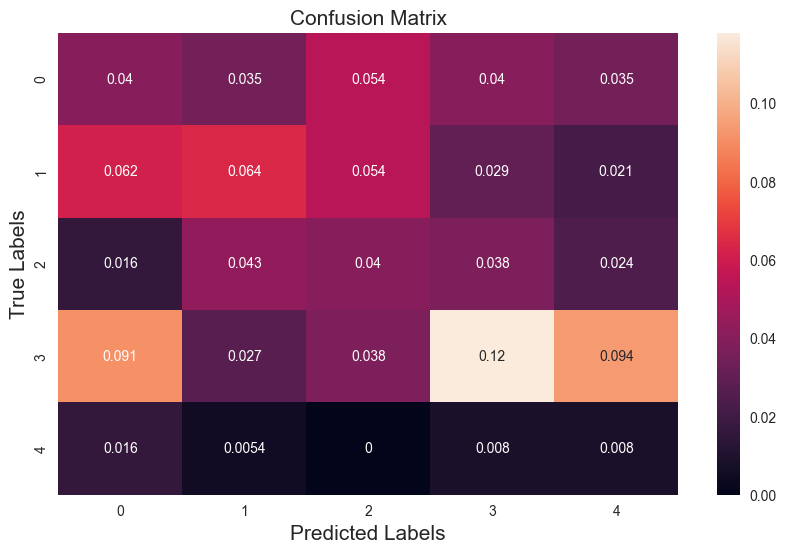

In [26]:
import seaborn as sns


matrix = confusion_matrix(pred_classes, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);

### Embedding

In [27]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, input_dim=input_dim, activation='relu'),
tf.keras.layers.Dropout(0.25, name="dropout"),
tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=30,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2866 - loss: 1.5399 - val_accuracy: 0.5000 - val_loss: 1.3065
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9230 - loss: 0.5594 - val_accuracy: 0.8393 - val_loss: 0.6067
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9941 - loss: 0.0727 - val_accuracy: 0.8304 - val_loss: 0.4722
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.8661 - val_loss: 0.4102
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.8839 - val_loss: 0.3772
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8750 - val_loss: 0.3834
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8929 - val_loss: 0.3795
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8929 - val_loss

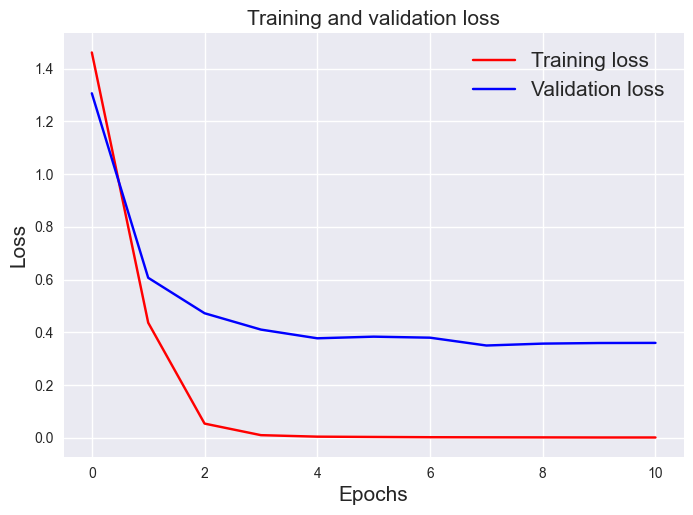

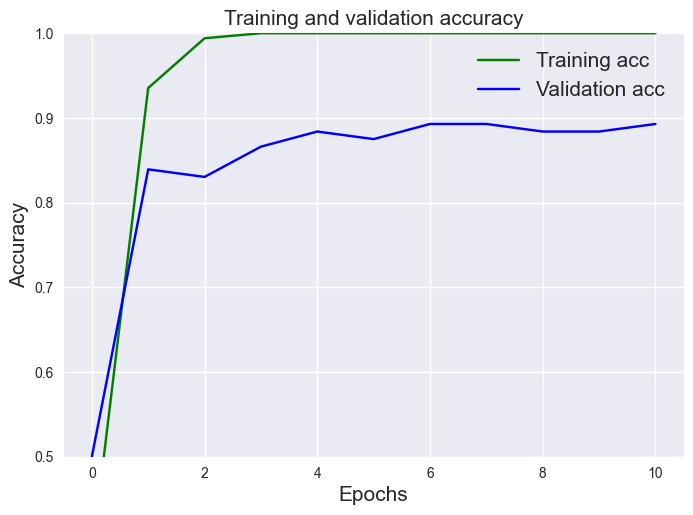

In [30]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)  # Convert softmax outputs to class labels

print("---Test Set Results---")
print("Accuracy: {}".format(accuracy_score(y_test, pred_classes)))
print(classification_report(y_test, pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
---Test Set Results---
Accuracy: 0.9276139410187667
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        84
           1       0.90      0.92      0.91        65
           2       0.94      0.93      0.93        69
           3       1.00      0.97      0.98        87
           4       0.87      0.96      0.91        68

    accuracy                           0.93       373
   macro avg       0.93      0.93      0.93       373
weighted avg       0.93      0.93      0.93       373



Text(0.5, 1.0, 'Confusion Matrix')

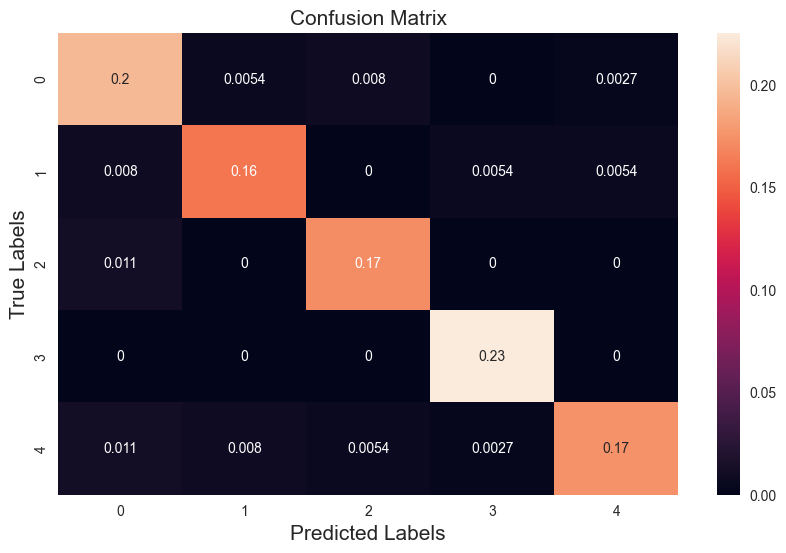

In [32]:
import seaborn as sns


matrix = confusion_matrix(pred_classes, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);

## LSTM

In [33]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
tf.keras.layers.Dropout(0.1, name="dropout"),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
history = model.fit(X_train, y_train, epochs=30,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - accuracy: 0.2852 - loss: 1.5683 - val_accuracy: 0.5446 - val_loss: 1.2508
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.6573 - loss: 0.9751 - val_accuracy: 0.7054 - val_loss: 0.9014
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.8390 - loss: 0.5653 - val_accuracy: 0.8125 - val_loss: 0.5702
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9595 - loss: 0.2342 - val_accuracy: 0.8393 - val_loss: 0.5044
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9665 - loss: 0.1467 - val_accuracy: 0.8393 - val_loss: 0.4899
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.9654 - loss: 0.1125 - val_accuracy: 0.8214 - val_loss: 0.5572
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9914 - loss: 0.1536 - val_accuracy: 0.8571 - val_loss: 0.4310
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.9947 - loss: 0.0635 - val_accuracy: 0.8750 - v

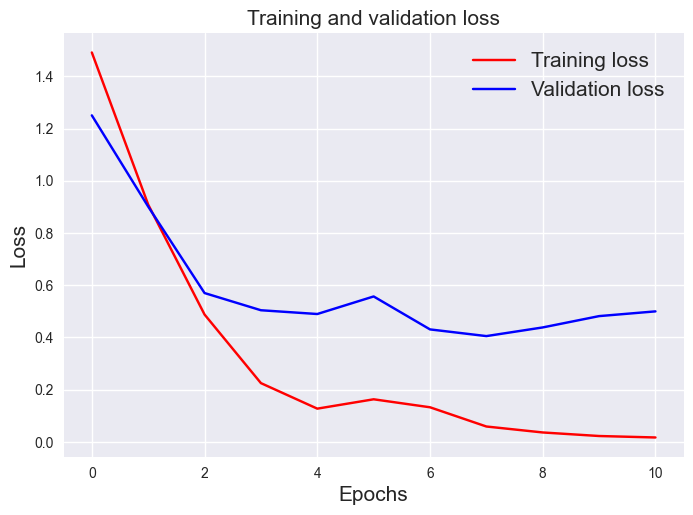

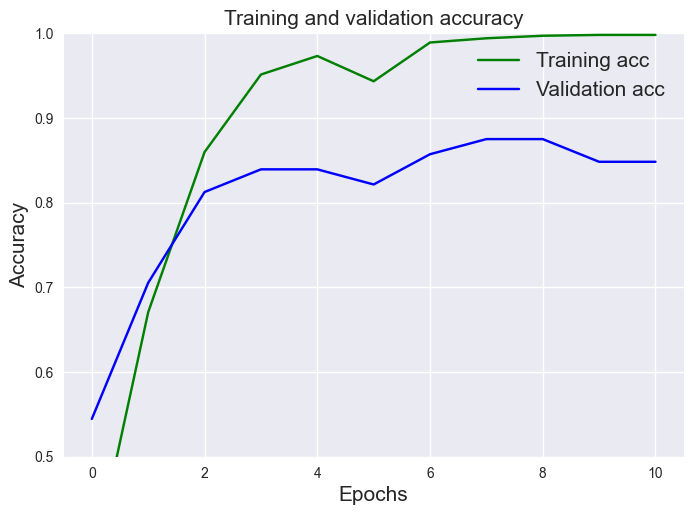

In [36]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)  # Convert softmax outputs to class labels

print("---Test Set Results---")
print("Accuracy: {}".format(accuracy_score(y_test, pred_classes)))
print(classification_report(y_test, pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step 
---Test Set Results---
Accuracy: 0.9061662198391421
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        84
           1       0.82      0.91      0.86        65
           2       0.95      0.84      0.89        69
           3       0.98      1.00      0.99        87
           4       0.94      0.93      0.93        68

    accuracy                           0.91       373
   macro avg       0.91      0.90      0.90       373
weighted avg       0.91      0.91      0.91       373



Text(0.5, 1.0, 'Confusion Matrix')

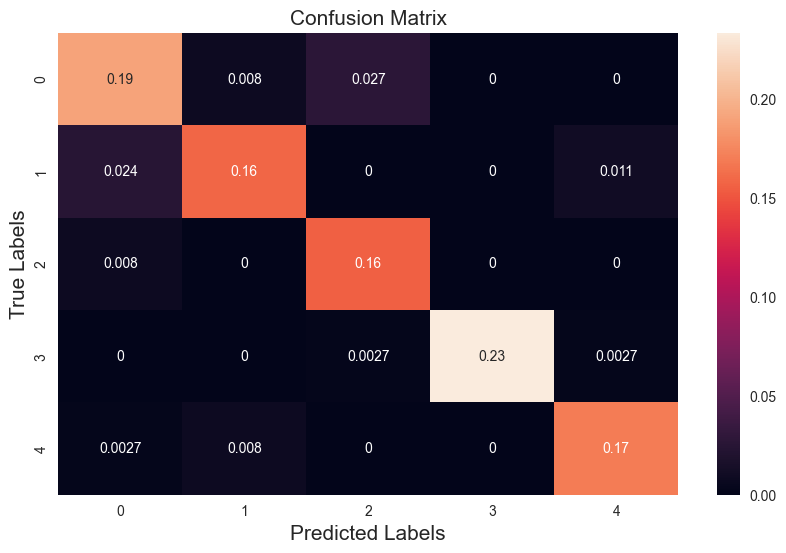

In [38]:
import seaborn as sns


matrix = confusion_matrix(pred_classes, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);

This model has the same results as the dense model with embedding, but a longer run time. 

## BiLSTM + CNN 

In [39]:
# Define the model
model = tf.keras.models.Sequential([
    # Embedding Layer
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    
    # Bidirectional LSTM to capture sequential dependencies
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),

    # CNN Layer for extracting spatial patterns
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),

    # Fully Connected Layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Output Layer (5 classes)
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# Print Model Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.2236 - loss: 1.6011 - val_accuracy: 0.4375 - val_loss: 1.5321
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.3506 - loss: 1.4189 - val_accuracy: 0.4196 - val_loss: 1.1792
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.5830 - loss: 0.9588 - val_accuracy: 0.7500 - val_loss: 0.5960
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8324 - loss: 0.4518 - val_accuracy: 0.8482 - val_loss: 0.5507
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8827 - loss: 0.3280 - val_accuracy: 0.8750 - val_loss: 0.3825
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9611 - loss: 0.1457 - val_accuracy: 0.8482 - val_loss: 0.5110
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9613 - loss: 0.1017 - val_accuracy: 0.8482 - val_loss: 0.7246
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9818 - loss: 0.0837 - val_accuracy: 0.8571 - v

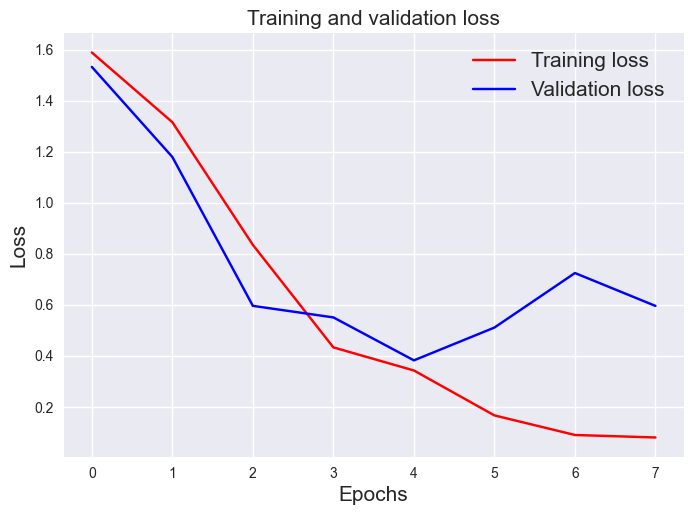

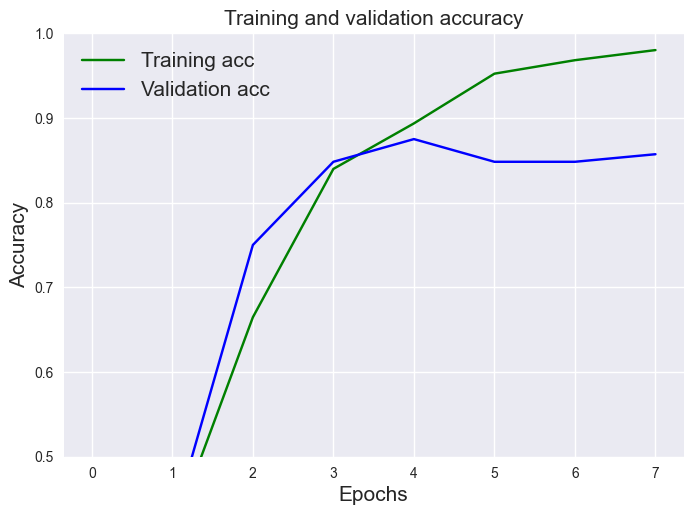

In [41]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

In [42]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)  # Convert softmax outputs to class labels

print("---Test Set Results---")
print("Accuracy: {}".format(accuracy_score(y_test, pred_classes)))
print(classification_report(y_test, pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 
---Test Set Results---
Accuracy: 0.8793565683646113
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        84
           1       0.91      0.92      0.92        65
           2       0.94      0.93      0.93        69
           3       0.98      0.95      0.97        87
           4       0.78      0.91      0.84        68

    accuracy                           0.88       373
   macro avg       0.88      0.88      0.88       373
weighted avg       0.88      0.88      0.88       373



Text(0.5, 1.0, 'Confusion Matrix')

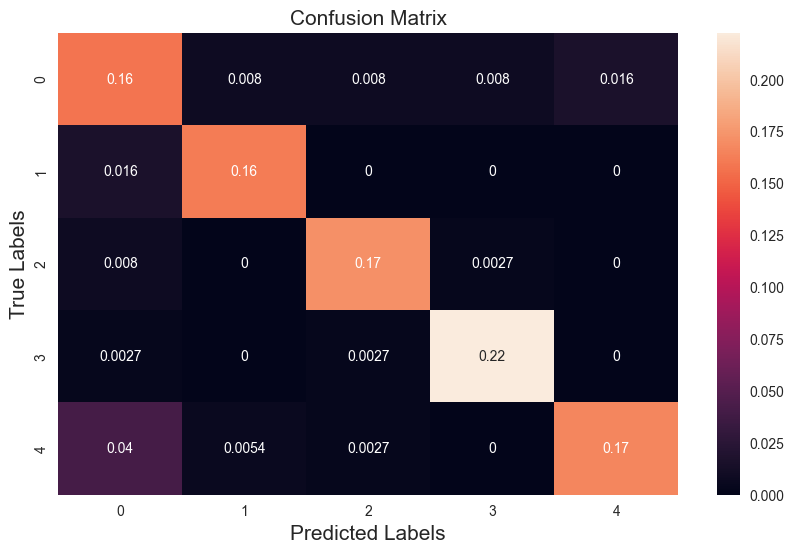

In [43]:
import seaborn as sns


matrix = confusion_matrix(pred_classes, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);

# BiGRU + CNN

In [44]:
# Define the model
model = tf.keras.models.Sequential([
    # Embedding Layer
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    
    # Bidirectional GRU to capture sequential dependencies
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.3),

    # CNN Layer for extracting spatial patterns
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),

    # Fully Connected Layers
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    # Output Layer (5 classes)
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy'])

# Print Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30,validation_split=0.1, batch_size=30, shuffle=True, callbacks=[early_stop])

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.2281 - loss: 1.5990 - val_accuracy: 0.2946 - val_loss: 1.5357
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3660 - loss: 1.4454 - val_accuracy: 0.5714 - val_loss: 0.9395
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6706 - loss: 0.7386 - val_accuracy: 0.7857 - val_loss: 0.6390
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.8588 - loss: 0.3626 - val_accuracy: 0.8125 - val_loss: 0.6578
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9337 - loss: 0.1876 - val_accuracy: 0.9018 - val_loss: 0.6362
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9756 - loss: 0.0866 - val_accuracy: 0.8750 - val_loss: 0.6956
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9787 - loss: 0.0678 - val_accuracy: 0.9107 - val_loss: 0.8269
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9836 - loss: 0.0517 - val_accuracy: 0.8304 - v

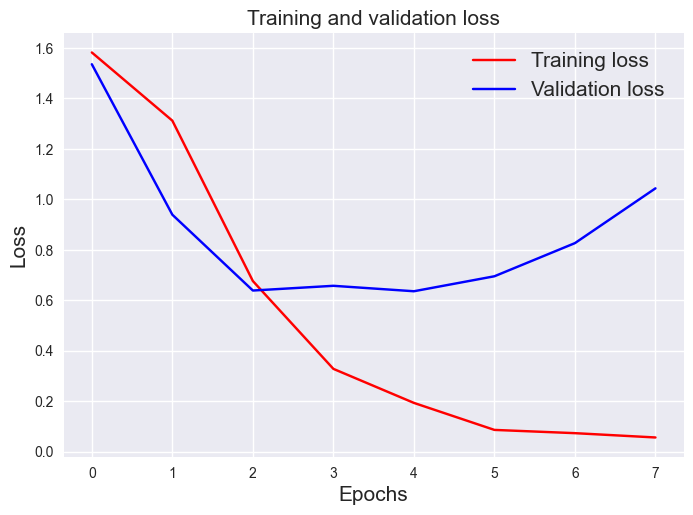

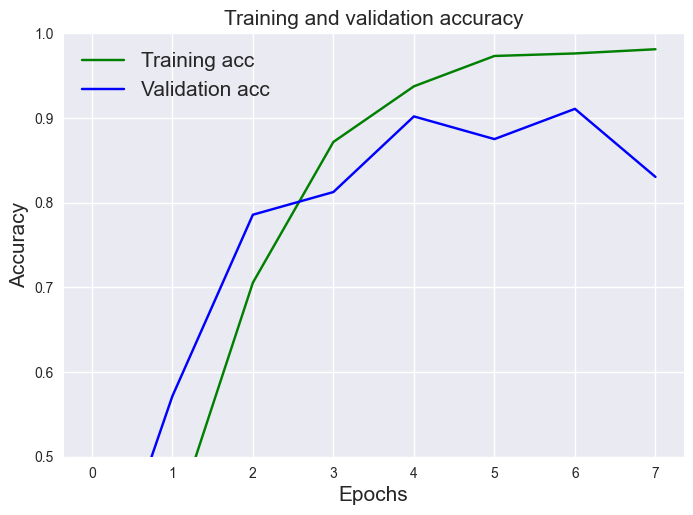

In [46]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

# plt.figure(figsize=(10,6))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Loss', size=15)
plt.legend(prop={'size': 15})
plt.show()

# plt.figure(figsize=(10,6))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=15)
plt.xlabel('Epochs', size=15)
plt.ylabel('Accuracy', size=15)
plt.legend(prop={'size': 15})
plt.ylim((0.5,1))
plt.show()

In [47]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = model.predict(X_test)

pred_classes = np.argmax(pred, axis=1)  # Convert softmax outputs to class labels

print("---Test Set Results---")
print("Accuracy: {}".format(accuracy_score(y_test, pred_classes)))
print(classification_report(y_test, pred_classes))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step 
---Test Set Results---
Accuracy: 0.8471849865951743
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        84
           1       0.95      0.82      0.88        65
           2       0.95      0.80      0.87        69
           3       0.93      0.93      0.93        87
           4       0.66      0.84      0.74        68

    accuracy                           0.85       373
   macro avg       0.86      0.84      0.85       373
weighted avg       0.86      0.85      0.85       373



Text(0.5, 1.0, 'Confusion Matrix')

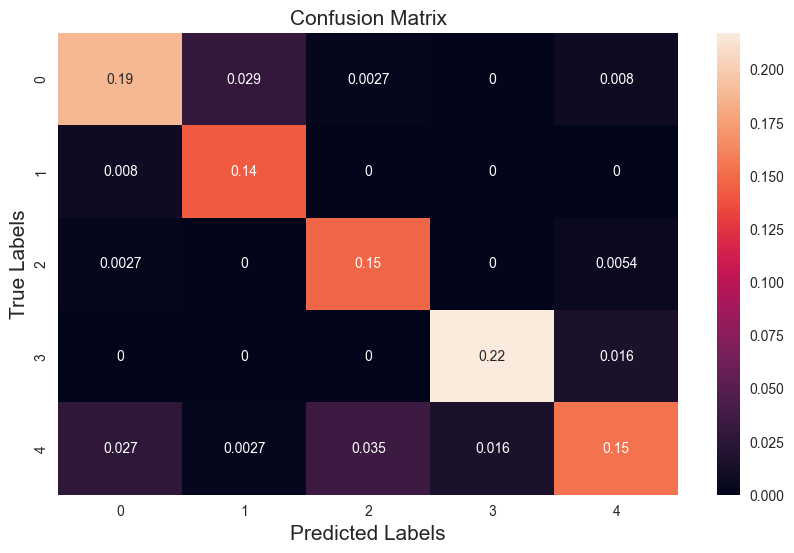

In [48]:
import seaborn as sns


matrix = confusion_matrix(pred_classes, y_test, normalize='all')
plt.figure(figsize=(10, 6))
ax= plt.subplot()
sns.heatmap(matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted Labels', size=15)
ax.set_ylabel('True Labels', size=15)
ax.set_title('Confusion Matrix', size=15)
# ax.xaxis.set_ticklabels([0,1], size=15)
# ax.yaxis.set_ticklabels([0,1], size=15);